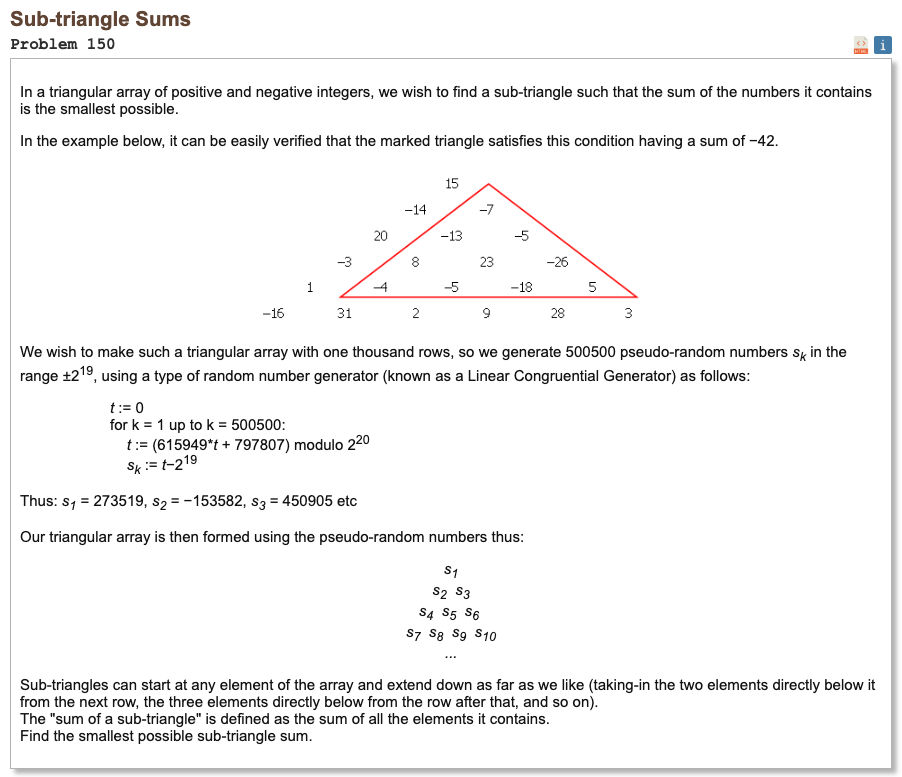

## Initial approach

* generate 500500 numbers with the given linear congruential generator and shift by 2^19
* lay them into 1000 rows so row r has r+1 elements
* build prefix sums for every row so any contiguous slice on that row is O(1)
* a downward sub triangle at top (i j) with height h adds the row slice on row i+h from j to j+h
* grow each triangle height step by step while keeping a running sum to avoid recounting earlier rows
* track the smallest running sum seen over all tops and all heights
* total sub triangles are many but this incremental approach keeps each height extension O(1)
* no external libraries are needed beyond built ins

In [1]:
def generate_s(n_rows=1000):
    total = n_rows * (n_rows + 1) // 2
    t = 0
    mod = 1 << 20
    shift = 1 << 19
    s = []
    for _ in range(total):
        t = (615949 * t + 797807) % mod
        s.append(t - shift)
    return s

def build_triangle(s, n_rows=1000):
    tri = []
    idx = 0
    for r in range(n_rows):
        row = s[idx:idx + r + 1]
        tri.append(row)
        idx += r + 1
    return tri

def row_prefixes(tri):
    pref = []
    for row in tri:
        p = [0]
        for v in row:
            p.append(p[-1] + v)
        pref.append(p)
    return pref

def row_slice_sum(pref, r, c0, c1_inclusive):
    return pref[r][c1_inclusive + 1] - pref[r][c0]

def min_subtriangle_sum(n_rows=1000):
    s = generate_s(n_rows)
    tri = build_triangle(s, n_rows)
    pref = row_prefixes(tri)
    best = 10**100
    for i in range(n_rows):
        row_len = i + 1
        for j in range(row_len):
            curr = 0
            max_h = n_rows - i
            for h in range(max_h):
                r = i + h
                curr += row_slice_sum(pref, r, j, j + h)
                if curr < best:
                    best = curr
    return best

In [2]:
%%time

result = min_subtriangle_sum(1000)
print("Result:", result)

Result: -271248680
CPU times: user 17.8 s, sys: 75.8 ms, total: 17.9 s
Wall time: 18 s
